# Sistema generalizado de Lotka-Volterra

##### **¿Cómo medir claramente el impacto de la intensificación?**

* Para las especies basales elegir tasa de crecimiento ($r_i$) grande y efecto sobre sí misma ($a_{ii}$) pequeño. Además, una población inicial grande.
* Para las especies top elegir una población inicial pequeña.

In [1]:
# Módulos necesarios
import numpy as np
import networkx as nx
import seaborn
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from copy import deepcopy

<IPython.core.display.Javascript object>


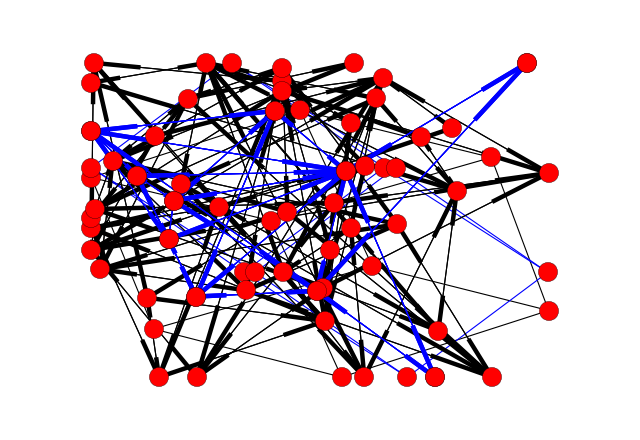

In [6]:

G=nx.cubical_graph()
nx.draw(G)
nx.draw(G,pos=nx.spectral_layout(G), nodecolor='r',edge_color='b')
plt.show()

In [50]:
ci = deepcopy(condiciones_iniciales)
ci *= 100
print ci, condiciones_iniciales

mi2 = deepcopy(matriz_interacciones)

for i in range(10):
    mi2[i][i] = 0

[  107.59849435   414.75795471   253.08691531   346.63337198   131.43266654
   131.45052083   139.98769236  8748.99988911   252.61419707  9970.46900035] [  1.07598494   4.14757955   2.53086915   3.46633372   1.31432667
   1.31450521   1.39987692  87.48999889   2.52614197  99.70469   ]


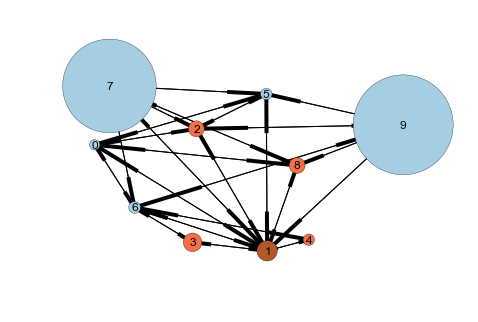

In [73]:
H = nx.DiGraph(matriz_interacciones)

nx.draw_spring(H, with_labels=True, node_size=ci, 
                 node_color=identidades, cmap="Paired")
plt.show()

In [63]:
nx.DiGraph.selfloop_edges(H)

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9)]

In [2]:
np.set_printoptions(precision=3)

In [19]:
%matplotlib inline

Comunidad y funciones necesarias:

In [7]:
condiciones_iniciales = np.loadtxt("osFri-Jan-30-114717-2015-c.txt")
tasas_reproduccion = np.loadtxt("osFri-Jan-30-114717-2015-v.txt")
matriz_interacciones = np.loadtxt("osFri-Jan-30-114717-2015-m.txt")

In [26]:
%run vector_identidades_2.py

In [5]:
def d_lotkavolterra_alea_3(x, t, r_alea, a_alea, manejo): 
    """
    Ecuacion de lotka volterra generalizada que incorpora la intensidad de manejo.
    **De esta forma, la población crece en forma proporcional al manejo.
    """
    dx = x * (r_alea + np.dot(a_alea, x))
    return dx

In [ ]:
def d_lotkavolterra_alea_4(x, t, r_alea, a_alea, manejo): 
    """
    Ecuacion de lotka volterra generalizada que incorpora la intensidad de manejo.
    **De esta forma, la población crece en forma proporcional al manejo.
    """
    dx = x * (r_alea + np.dot(a_alea, x))
    for i in range(dx.size):
        if abs(dx[i]) >= 3.:
            if dx[i] > 0:
                dx[i] = 3.
            elif dx[i] < 0:
                dx[i] = -3.0
            
    return dx

In [7]:
def riqueza_sin_espacio(poblacion, t=-1):
    n_especies = poblacion.shape[1]
    return (sum([i>0.0001 for i in poblacion[t]]))

Identidades de las especies:

In [27]:
identidades = vector_identidades_2(matriz_interacciones)
print identidades

[ 0.  2.  1.  1.  1.  0.  0.  0.  1.  0.]


In [ ]:
?vector_identidades_2

### Tasas de reproducción:

In [ ]:
print tasas_reproduccion

In [ ]:
tr2 = deepcopy(tasas_reproduccion)
tr2[1] *= 10
tr2[[2, 3, 4, 8]] *= 10
print tasas_reproduccion, "\n", tr2

### Matriz de interacciones

In [38]:
mi2 = deepcopy(matriz_interacciones)
#mi2[1][1] *= 10

for i in [0, 1, 5, 6, 7, 9]:
    mi2[i][i] *= 10

for i in [2, 3, 4, 8]:
    mi2[i][i] *= 10

In [ ]:
mi3 = deepcopy(matriz_interacciones)
for i in [2, 3, 4, 8]:
    mi3[i][i] = mi3[i][i] / 10

for i in [0, 1, 5, 6, 7, 9]:
    mi3[i][i] *= 10

In [25]:
print mi2[0][0], "\n", matriz_interacciones[0][0]

-1.84712353585 
-0.184712353585


In [44]:
print mi2
print matriz_interacciones

[[-1.847 -0.151  1.807  0.     0.     0.237 -0.151  0.     0.097  0.   ]
 [ 0.147 -1.884  0.699  1.308  0.721  0.609  0.916  0.177  1.502  0.168]
 [-0.028 -0.143 -0.168  0.     0.    -0.084  0.    -0.15   0.    -0.008]
 [ 0.    -0.133  0.    -0.02   0.     0.    -0.1    0.     0.     0.   ]
 [ 0.    -0.142  0.     0.    -0.162  0.    -0.11   0.     0.     0.   ]
 [-0.173 -0.107  1.119  0.     0.    -1.742  0.    -0.072  0.    -0.157]
 [ 1.186 -0.152  0.     0.268  1.031  0.    -1.904  0.943  0.     0.034]
 [ 0.    -0.176  0.291  0.     0.     1.797 -0.125 -1.24   0.482  0.   ]
 [-0.147 -0.173  0.     0.     0.     0.     0.    -0.136 -0.167 -0.082]
 [ 0.    -0.089  0.301  0.     0.     1.919 -0.157  0.     0.471 -1.01 ]]
[[-0.185 -0.151  1.807  0.     0.     0.237 -0.151  0.     0.097  0.   ]
 [ 0.147 -0.188  0.699  1.308  0.721  0.609  0.916  0.177  1.502  0.168]
 [-0.028 -0.143 -0.168  0.     0.    -0.084  0.    -0.15   0.    -0.008]
 [ 0.    -0.133  0.    -0.02   0.     0.    -0.1  

In [ ]:
print mi2[9]
print tr2
print ci2

In [ ]:
fig = plt.figure()
seaborn.heatmap(mi2, square= True)
plt.show() 

### Condiciones iniciales

In [ ]:
#ci2 = deepcopy(condiciones_iniciales)
ci2 = np.random.random(10)
ci2[[2, 3, 4, 8]] = ci2[[2, 3, 4, 8]] * 100
ci2[1] *= 1/10.
print ci2, condiciones_iniciales

In [22]:
ci2 = deepcopy(condiciones_iniciales)
ci2[2] = 0.0001
print ci2, condiciones_iniciales

[  1.076e+00   4.148e+00   1.000e-04   3.466e+00   1.314e+00   1.315e+00
   1.400e+00   8.749e+01   2.526e+00   9.970e+01] [  1.076   4.148   2.531   3.466   1.314   1.315   1.4    87.49    2.526
  99.705]


In [ ]:
%matplotlib inline
print tr2, tasas_reproduccion
seaborn.heatmap(mi3, square=True)

<IPython.core.display.Javascript object>


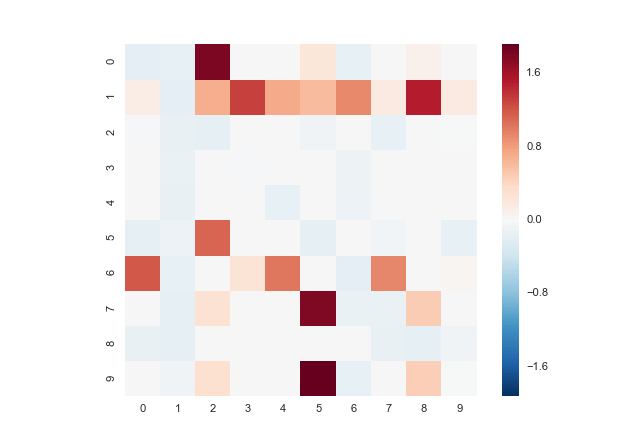

In [53]:
fig = plt.figure()
seaborn.heatmap(matriz_interacciones, square=True)
plt.show() 

<IPython.core.display.Javascript object>


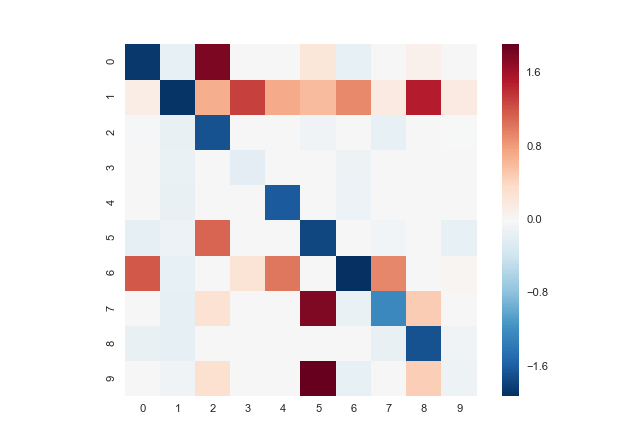

In [54]:
fig = plt.figure()
seaborn.heatmap(mi2, square=True)
plt.show() 

Dinámica de poblaciones sin espacio:

In [39]:
t_total = 1000
tiempo = np.linspace(0, 1000, t_total+1)

manejo = 1.0 # bosque - como en modelo original
x, infodictx = odeint(d_lotkavolterra_alea_3, condiciones_iniciales, tiempo, 
           args=(tasas_reproduccion,matriz_interacciones, manejo), full_output=True)

y, infodicty = odeint(d_lotkavolterra_alea_3, condiciones_iniciales, tiempo, 
           args=(tasas_reproduccion, mi2, manejo), full_output=True)

#z, infodictz = odeint(d_lotkavolterra_alea_4, ci2, tiempo, 
#           args=(tr2, mi2, manejo), full_output=True, hmax=0.1)

#z = odeint(d_lotkavolterra_alea_3, condiciones_iniciales, tiempo, 
#           args=(tr3, matriz_interacciones, manejo))

In [40]:
print infodictx["message"]
print infodicty["message"]
#print infodictz["message"]

Integration successful.
Integration successful.


In [41]:
riqueza_x = np.zeros_like(tiempo)
riqueza_y = np.zeros_like(tiempo)
#riqueza_z = np.zeros_like(tiempo)


for t in range(t_total+1):
    riqueza_x[t] = riqueza_sin_espacio(x, t)
    riqueza_y[t] = riqueza_sin_espacio(y, t)
#    riqueza_z[t] = riqueza_sin_espacio(z, t)

<IPython.core.display.Javascript object>


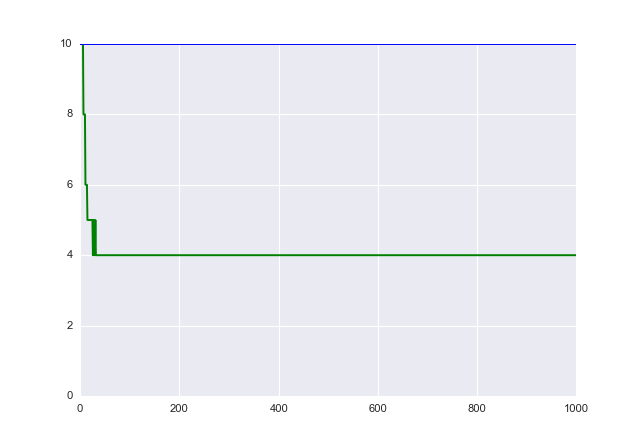

In [52]:
# Graficar riqueza vs tiempo
fig = plt.figure()
fig.add_subplot(111)
plt.plot(tiempo, riqueza_x, color="green")
plt.plot(tiempo, riqueza_y, color="blue")
#plt.plot(tiempo, riqueza_z, color="red")
plt.ylim(ymax = 10, ymin = 0)
plt.xlim(xmax = 999)
plt.show() 

<IPython.core.display.Javascript object>


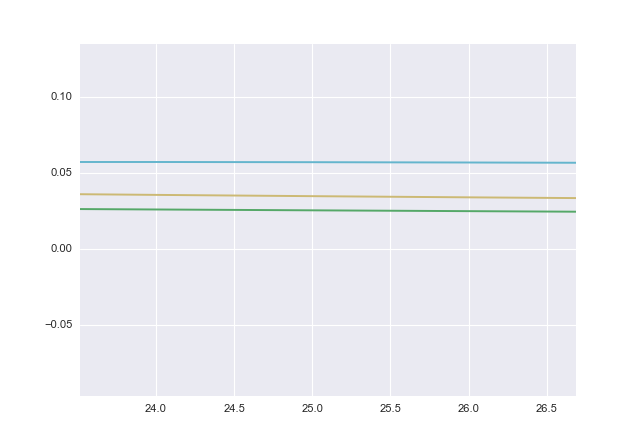

In [43]:
#Graficar sistema
fig = plt.figure()
fig.add_subplot(111)
#plt.plot(tiempo, x[:, [3]], color="red")
#plt.plot(tiempo, x)
#fig.add_subplot(211)
plt.plot(tiempo, y)
#plt.plot(tiempo, z[:, [3]], color = "red")
#plt.xlim(xmax = 1000)
#plt.ylim(ymin = -1, ymax = 400)
plt.show()

<IPython.core.display.Javascript object>


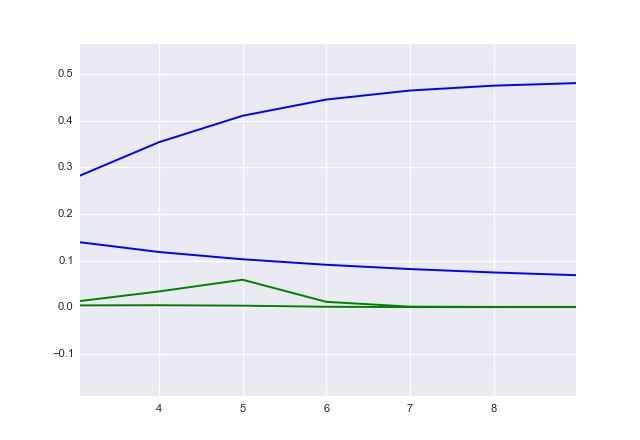

In [45]:
#Graficar la población de una especie
fig = plt.figure()
fig.add_subplot(111)
#plt.plot(tiempo, x[:, [0]], color="red")
plt.plot(tiempo, x[:, [4, 8]], color = "green")
plt.plot(tiempo, y[:, [4, 8]], color = "blue")
#plt.plot(tiempo, z[:, [3]], color = "red")
plt.xlim(xmax = 20)
plt.show()

In [1]:
# Execute this cell to load the notebook's style sheet, then ignore it
# (From numericalmooc by Lorena Barba)
from IPython.core.display import HTML
css_file = "C:\Users\hp\Desktop\proyectof\style.css"
HTML(open(css_file, "r").read())